#Question1-KNN Algorithm

In [ ]:
import pandas as pd
import numpy as np
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

#reading the files and assigning the Y as the class name and X as the data
X = pd.read_csv('iris.data',usecols=[0,1,2,3],header=None)
Y = pd.read_csv('iris.data',usecols=[4],header=None)

--2020-11-15 15:22:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-11-15 15:22:06 (57.5 MB/s) - ‘iris.data’ saved [4551/4551]



In [ ]:
#Normalization of data
min=np.zeros(X.shape[1])
max=np.zeros(X.shape[1])
for i in range(X.shape[1]):
  min[i]=X[i].min()
  max[i]=X[i].max()
  X[i]=(X[i]-min[i])/(max[i]-min[i])

In [ ]:
Y=np.array(Y)
X=np.array(X)

In [ ]:
#Function for calculation of euclidean distance between two data points
def euclidean(X,Y):
  sum=0
  for i in range(4):
    sum+=(X[i]-Y[i])**2
  return np.sqrt(sum)

In [ ]:
#KNN Alogrithm function
def knn_algo(test,dataset,k):
  p=dataset.shape[0]
  D=np.zeros(p)
  for i in range(p):
    D[i]=euclidean(dataset[i],test)
  S=[]
  K=sorted(D)[:k]              #choosing least k euclidean distance
  for j in range(p):
    for l in range(k):
      if D[j]==K[l]:
        S.append(Y[j][0])
  #Choosing the most occured class in the k nearest neighbours
  counter = 0
  output_class=S[0]
  for i in S:
      curr_frequency = S.count(i)
      if(curr_frequency> counter):
          counter = curr_frequency
          output_class = i
  
  return output_class

In [ ]:
Y1= [5.1,2.5,3.2,4.3]
Y2= [4.9,3,1.4,0.2]
Y3=[6,3,4.8,1.8]
#Normalization of the given test data
for i in range(X.shape[1]):
  Y1[i]=(Y1[i]-min[i])/(max[i]-min[i])
for i in range(X.shape[1]):
  Y2[i]=(Y2[i]-min[i])/(max[i]-min[i])
for i in range(X.shape[1]):
  Y3[i]=(Y3[i]-min[i])/(max[i]-min[i])
print("The predicted class for Y1 is",knn_algo(Y1,X,5))
print("The predicted class for Y2 is",knn_algo(Y2,X,5))
print("The predicted class for Y3 is",knn_algo(Y3,X,5))

The predicted class for Y1 is Iris-virginica
The predicted class for Y2 is Iris-setosa
The predicted class for Y3 is Iris-virginica


In [121]:
#Accuracy for iris-setosa
f=0
for i in range(0,50):
  t=knn_algo(X[i],X,5)
  if t==Y[i][0]:
    f=f+1
accuracy=(f)/(50)
print("The accuracy for setosa class is",accuracy)

The accuracy for setosa class is 1.0


In [122]:
#Accuracy for iris-versicolor
f=0
for i in range(50,100):
  t=knn_algo(X[i],X,5)
  if t==Y[i][0]:
    f=f+1
accuracy=(f)/(50)
print("The accuracy for versicolor class is",accuracy)

The accuracy for versicolor class is 0.96


In [ ]:
#Accuracy for iris-virginica
f=0
for i in range(100,150):
  t=knn_algo(X[i],X,5)
  if t==Y[i][0]:
    f=f+1
accuracy=(f)/(50)
print("The accuracy for virginica class is",accuracy)

The accuracy for virginica class is 0.92


In [ ]:
for k in range(2,20):
 f=0
 for i in range(150):
   t=knn_algo(X[i],X,k)
   if t==Y[i][0]:
     f=f+1
 accuracy=(f)/150
 print("For k=",k,"the accuracy is ",accuracy)

For k= 1 the accuracy is  1.0
For k= 2 the accuracy is  0.9733333333333334
For k= 3 the accuracy is  0.9666666666666667
For k= 4 the accuracy is  0.96
For k= 5 the accuracy is  0.96
For k= 6 the accuracy is  0.9666666666666667
For k= 7 the accuracy is  0.9666666666666667
For k= 8 the accuracy is  0.9666666666666667
For k= 9 the accuracy is  0.9733333333333334
For k= 10 the accuracy is  0.9666666666666667
For k= 11 the accuracy is  0.9666666666666667
For k= 12 the accuracy is  0.9666666666666667
For k= 13 the accuracy is  0.9733333333333334
For k= 14 the accuracy is  0.9666666666666667
For k= 15 the accuracy is  0.9666666666666667
For k= 16 the accuracy is  0.9733333333333334
For k= 17 the accuracy is  0.9733333333333334
For k= 18 the accuracy is  0.9666666666666667
For k= 19 the accuracy is  0.9666666666666667


The accuracy comes maximum for k=2,9,13,
16,17

The optimal solution will be for k=2,9

#Question2-KMeans Clustering

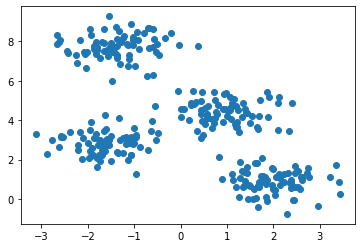

In [119]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/snehilsanyal/EE524/master/Assignments/dataset.csv"
data = pd.read_csv(url,usecols=[1,2])
plt.scatter(x=data["feature1"],y=data["feature2"])

Kmeans clustering for k = 2


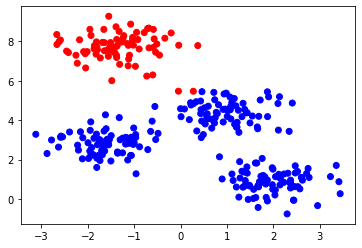

Kmeans clustering for k = 3


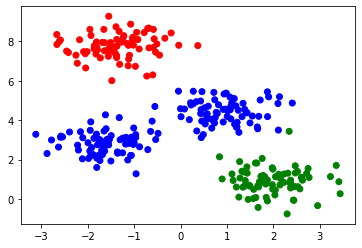

Kmeans clustering for k = 4


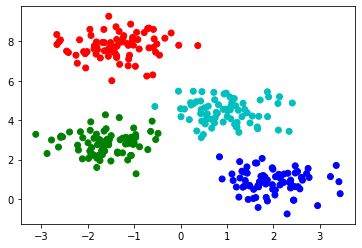

Kmeans clustering for k = 5


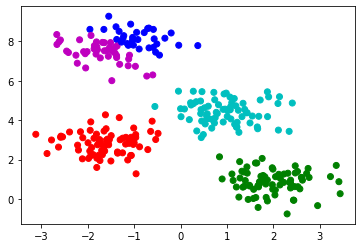

Kmeans clustering for k = 6


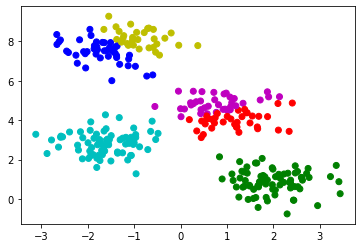

Kmeans clustering for k = 7


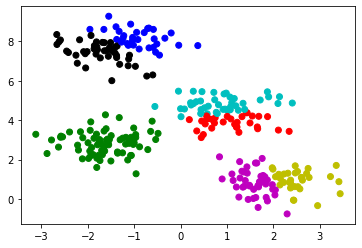

Kmeans clustering for k = 8


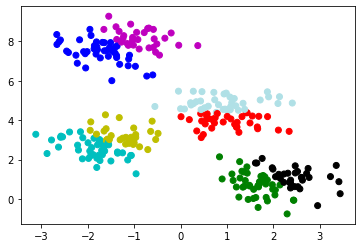

Kmeans clustering for k = 9


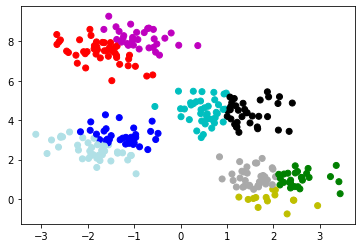

Kmeans clustering for k = 10


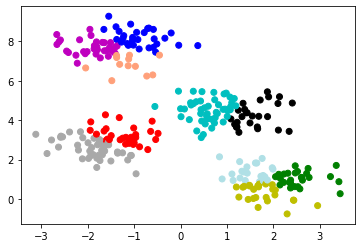

In [120]:
for k in range(2,11):
 kmean = KMeans(n_clusters=k)
 kmean.fit(data)
 plt.scatter(x = data["feature1"],y = data["feature2"],c=color[kmean.labels_])
 plt.title(print("Kmeans clustering for k =",k))
 plt.show()

The most appropriate value of k for kmeans is k=4 inferred from the plots